In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
df2 = df1.drop(["area_type","availability","society"],axis=1)
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [7]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [8]:
df2.balcony.value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [9]:
df2.balcony.unique()

array([ 1.,  3., nan,  2.,  0.])

In [10]:
df2.balcony.replace(np.nan,1,inplace=True) #bit non-obvious replacement of the data

In [11]:
df2.balcony.unique()

array([1., 3., 2., 0.])

In [12]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [13]:
df2.bath.unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [14]:
df2.bath.replace(np.nan,2,inplace=True) #meadian value is 2 hence.

In [15]:
df2.dropna(inplace=True)

In [16]:
df2.shape

(13303, 6)

In [17]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [18]:
df2['bhk'] = df2['size'].apply(lambda x: x.split()[0])
df2.drop(columns=['size'],axis=1,inplace=True)
df2.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [19]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [21]:
df2[~df2['total_sqft'].apply(is_float)].head(20)

,location,total_sqft,bath,balcony,price,bhk
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
56,Devanahalli,3010 - 3410,2.0,1.0,192.000,4
81,Hennur Road,2957 - 3450,2.0,1.0,224.500,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
224,Devanahalli,1520 - 1740,2.0,1.0,74.820,3
410,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,0.0,63.770,2


In [22]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return ((float(tokens[0])+float(tokens[1]))/2)
    try:
        return float(x)
    except:
        return None

In [23]:
df2.total_sqft = df2['total_sqft'].apply(convert_sqft_to_num)

In [24]:
df2[df2['total_sqft'].apply(is_float)].head(20)

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
5,Whitefield,1170.0,2.0,1.0,38.00,2
6,Old Airport Road,2732.0,4.0,1.0,204.00,4
7,Rajaji Nagar,3300.0,4.0,1.0,600.00,4
8,Marathahalli,1310.0,3.0,1.0,63.25,3
9,Gandhi Bazar,1020.0,6.0,1.0,370.00,6


In [25]:
df2.total_sqft.isnull().sum()

46

In [26]:
df2.dropna(inplace=True)

In [27]:
df2.head(10)

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
5,Whitefield,1170.0,2.0,1.0,38.00,2
6,Old Airport Road,2732.0,4.0,1.0,204.00,4
7,Rajaji Nagar,3300.0,4.0,1.0,600.00,4
8,Marathahalli,1310.0,3.0,1.0,63.25,3
9,Gandhi Bazar,1020.0,6.0,1.0,370.00,6


In [28]:
df2.bhk = df2['bhk'].astype(float)

In [29]:
df2.describe()

,total_sqft,bath,balcony,price,bhk
count,13257.000000,13257.000000,13257.000000,13257.000000,13257.000000
mean,1558.809175,2.688165,1.559629,112.471981,2.802670
std,1238.478935,1.336799,0.807475,149.092716,1.292117
min,1.000000,1.000000,0.000000,8.000000,1.000000
25%,1100.000000,2.000000,1.000000,50.000000,2.000000
50%,1275.000000,2.000000,2.000000,72.000000,3.000000
75%,1680.000000,3.000000,2.000000,120.000000,3.000000
max,52272.000000,40.000000,3.000000,3600.000000,43.000000


In [30]:
df3 = df2.copy()

In [31]:
df3['price_per_sqft'] = (df3['price']*100000)/df3['total_sqft']
df3.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2.0,4250.000000


In [32]:
len(df3.location.unique())

1298

In [33]:
pd.set_option("display.max_rows",None)

In [34]:
df3.location = df3.location.apply(lambda x:x.strip())

locations = df3.groupby('location')['location'].agg('count')
#locations

In [35]:
#locations.sort_values(ascending=False)

In [36]:
less_than_10 = locations[locations<=10]

In [37]:
df3.location = df3.location.apply(lambda x : 'other' if x in less_than_10 else x)
len(df3.location.unique())

241

In [38]:
df3.head(10)

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2.0,4250.000000
5,Whitefield,1170.0,2.0,1.0,38.00,2.0,3247.863248
6,Old Airport Road,2732.0,4.0,1.0,204.00,4.0,7467.057101
7,Rajaji Nagar,3300.0,4.0,1.0,600.00,4.0,18181.818182
8,Marathahalli,1310.0,3.0,1.0,63.25,3.0,4828.244275
9,other,1020.0,6.0,1.0,370.00,6.0,36274.509804


In [39]:
df3[(df3.total_sqft/df3.bhk)<300]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,other,1020.0,6.0,1.0,370.00,6.0,3.627451e+04
45,HSR Layout,600.0,9.0,1.0,200.00,8.0,3.333333e+04
58,Murugeshpalya,1407.0,4.0,1.0,150.00,6.0,1.066098e+04
68,Devarachikkanahalli,1350.0,7.0,0.0,85.00,8.0,6.296296e+03
70,other,500.0,3.0,2.0,100.00,3.0,2.000000e+04
78,Kaval Byrasandra,460.0,1.0,0.0,22.00,2.0,4.782609e+03
89,Rajaji Nagar,710.0,6.0,3.0,160.00,6.0,2.253521e+04
119,Hennur Road,276.0,3.0,3.0,23.00,2.0,8.333333e+03
129,Vishwapriya Layout,950.0,7.0,0.0,115.00,7.0,1.210526e+04
149,other,1034.0,5.0,1.0,185.00,6.0,1.789168e+04


In [40]:
len(df3[(df3.total_sqft/df3.bhk)<300])

744

In [41]:
df4 = df3[~((df3.total_sqft/df3.bhk)<300)]
print(df4.shape)
df4.head()

(12513, 7)


,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2.0,4250.000000


In [42]:
df4.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000,12513.000000
mean,1593.745883,2.560217,1.564133,111.400362,2.651642,6307.441644
std,1261.402072,1.078477,0.800854,152.104715,0.977059,4160.931610
min,300.000000,1.000000,0.000000,9.000000,1.000000,267.829813
25%,1116.000000,2.000000,1.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,2.000000,70.000000,3.000000,5295.007564
75%,1700.000000,3.000000,2.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3.000000,3600.000000,16.000000,176470.588235


In [43]:
print(df4[df4.bhk==16])
print(df4[df4.total_sqft==52272])
print(df4[df4.bath==16])
print(df4[df4.price==3600])
print(df4[df4.price_per_sqft==max(df4.price_per_sqft)]) # hence clearly we can see that there are few outliers as well.

     location  total_sqft  bath  balcony  price   bhk  price_per_sqft
3609    other     10000.0  16.0      1.0  550.0  16.0          5500.0
     location  total_sqft  bath  balcony  price  bhk  price_per_sqft
1894    other     52272.0   2.0      1.0  140.0  3.0      267.829813
     location  total_sqft  bath  balcony  price   bhk  price_per_sqft
3609    other     10000.0  16.0      1.0  550.0  16.0          5500.0
      location  total_sqft  bath  balcony   price   bhk  price_per_sqft
13067    other      7150.0  13.0      1.0  3600.0  10.0     50349.65035
     location  total_sqft  bath  balcony  price  bhk  price_per_sqft
7657    other       425.0   1.0      1.0  750.0  1.0   176470.588235


In [44]:
list(df4.columns)
list1 = ['total_sqft', 'bath', 'balcony', 'price', 'bhk', 'price_per_sqft']

In [45]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12513 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        12513 non-null  object 
 1   total_sqft      12513 non-null  float64
 2   bath            12513 non-null  float64
 3   balcony         12513 non-null  float64
 4   price           12513 non-null  float64
 5   bhk             12513 non-null  float64
 6   price_per_sqft  12513 non-null  float64
dtypes: float64(6), object(1)
memory usage: 782.1+ KB


In [46]:
df5 = pd.DataFrame()
for col in list1:
    Q1 = df4[col].quantile(0.25)
    Q3 = df4[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5*IQR)
    upper_limit = Q3 + (1.5*IQR)
    df5 = df4[(df4[col]>lower_limit) & (df4[col]<upper_limit)]

In [47]:
df5.shape

(11507, 7)

In [48]:
#df5

In [49]:
df5.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,11507.000000,11507.000000,11507.000000,11507.000000,11507.000000,11507.000000
mean,1522.853730,2.466759,1.562875,85.686168,2.574520,5415.071226
std,1203.406426,0.985381,0.791229,69.897989,0.909939,1757.830165
min,300.000000,1.000000,0.000000,9.000000,1.000000,267.829813
25%,1100.000000,2.000000,1.000000,47.600000,2.000000,4125.000000
50%,1279.000000,2.000000,2.000000,65.110000,2.000000,5106.100796
75%,1642.500000,3.000000,2.000000,99.000000,3.000000,6420.035475
max,52272.000000,16.000000,3.000000,2100.000000,16.000000,10967.098704


In [50]:
print(df5[df5.total_sqft==52272])

     location  total_sqft  bath  balcony  price  bhk  price_per_sqft
1894    other     52272.0   2.0      1.0  140.0  3.0      267.829813


In [51]:
outliers = pd.DataFrame()
for col in list1:
    Q1 = df4[col].quantile(0.25)
    Q3 = df4[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5*IQR)
    upper_limit = Q3 + (1.5*IQR)
    outliers = df4[(df4[col]<lower_limit) | (df4[col]>upper_limit)]

In [52]:
print(outliers.shape)
outliers

(1006, 7)


,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
7,Rajaji Nagar,3300.00,4.0,1.0,600.0,4.0,18181.818182
22,Thanisandra,2800.00,5.0,2.0,380.0,4.0,13571.428571
48,KR Puram,800.00,1.0,1.0,130.0,2.0,16250.000000
57,other,1500.00,2.0,2.0,185.0,2.0,12333.333333
62,Whitefield,5700.00,5.0,3.0,650.0,4.0,11403.508772
93,ISRO Layout,1200.00,4.0,2.0,155.0,4.0,12916.666667
107,Rajaji Nagar,1640.00,3.0,2.0,229.0,3.0,13963.414634
133,other,1200.00,4.0,0.0,210.0,4.0,17500.000000
159,Mahalakshmi Layout,3750.00,4.0,0.0,760.0,4.0,20266.666667
185,other,1846.00,3.0,2.0,300.0,3.0,16251.354280


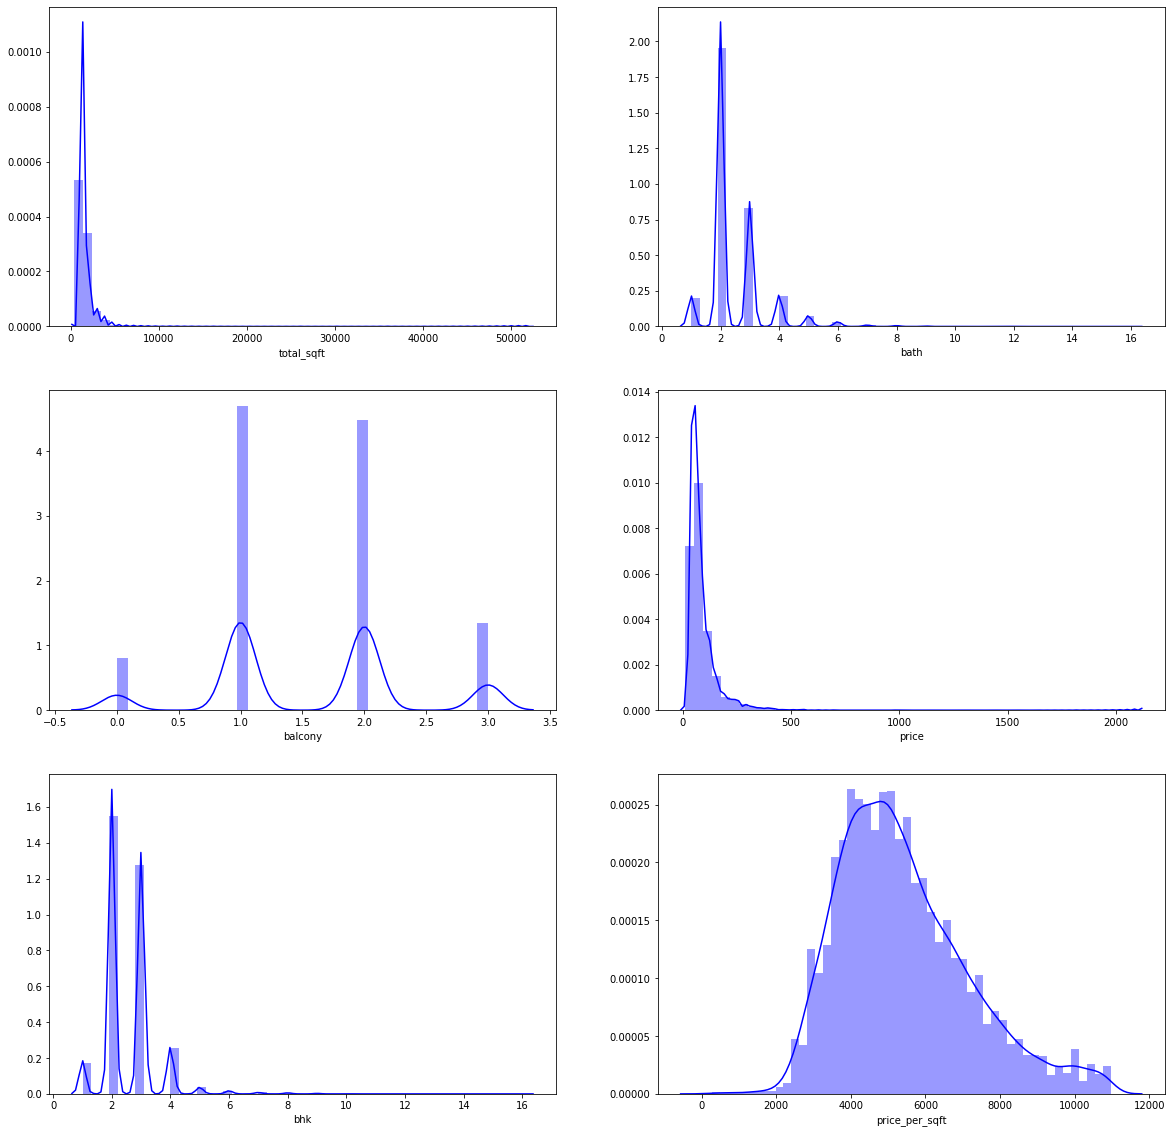

In [53]:
plt.figure(figsize=(20,20))
for i,col in enumerate(list1):
    plt.subplot(3,2,i+1)
    sns.distplot(df5[col],color = 'blue')
    
plt.show()

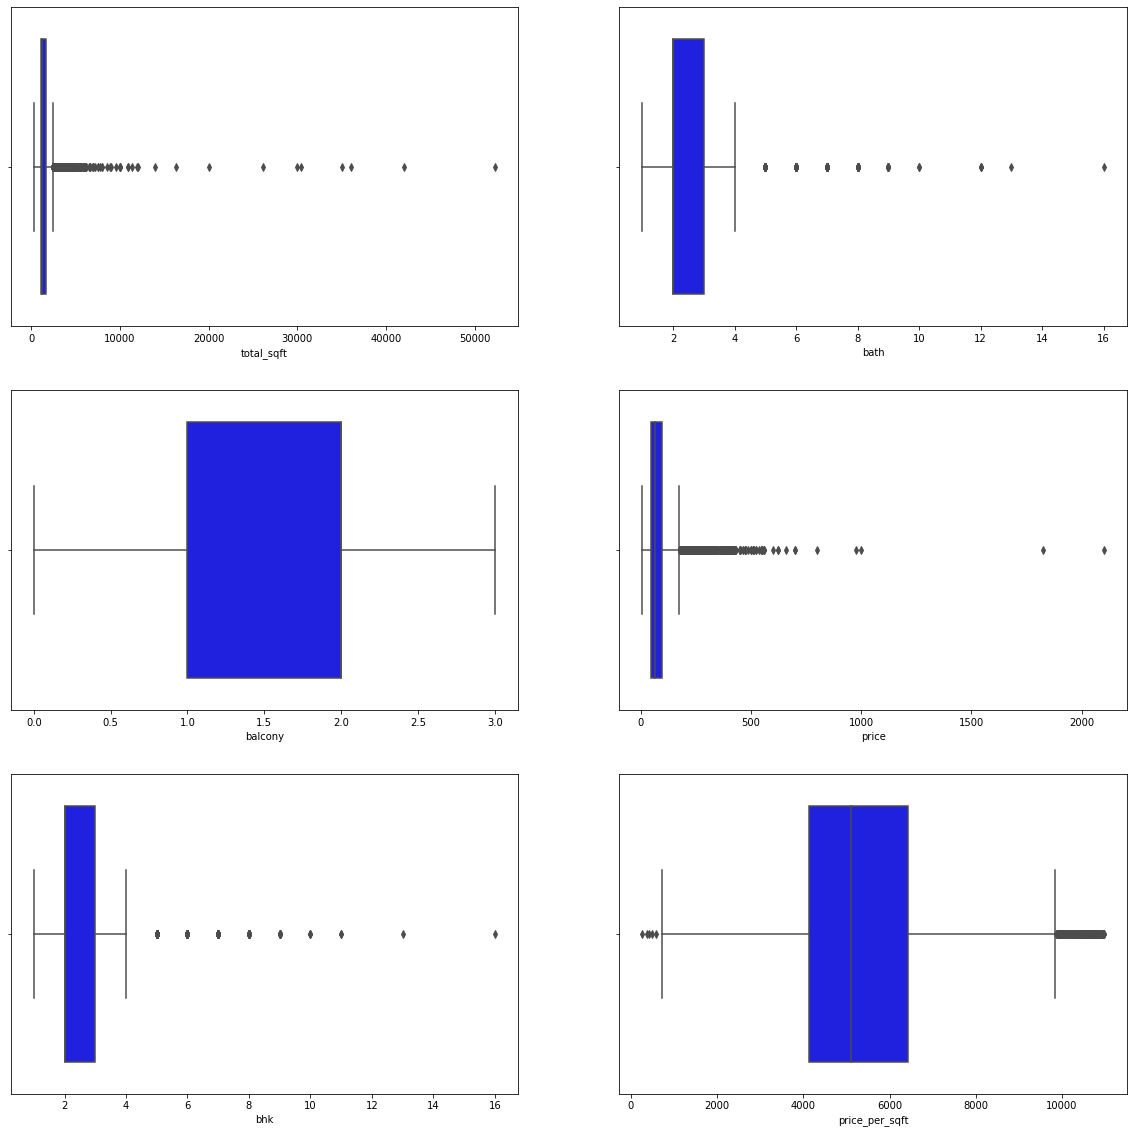

In [54]:
plt.figure(figsize=(20,20))
for i,col in enumerate(list1):
    plt.subplot(3,2,i+1)
    sns.boxplot(df5[col],color = 'blue')
    
plt.show()

In [55]:
df5[df5.bath > df5.bhk + 2]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
2620,other,11338.0,9.0,1.0,1000.0,6.0,8819.897689
7709,Chikkabanavar,2460.0,7.0,2.0,80.0,4.0,3252.032520
11366,Nagasandra,7000.0,8.0,1.0,450.0,4.0,6428.571429
12103,Thanisandra,1806.0,6.0,2.0,116.0,3.0,6423.034330


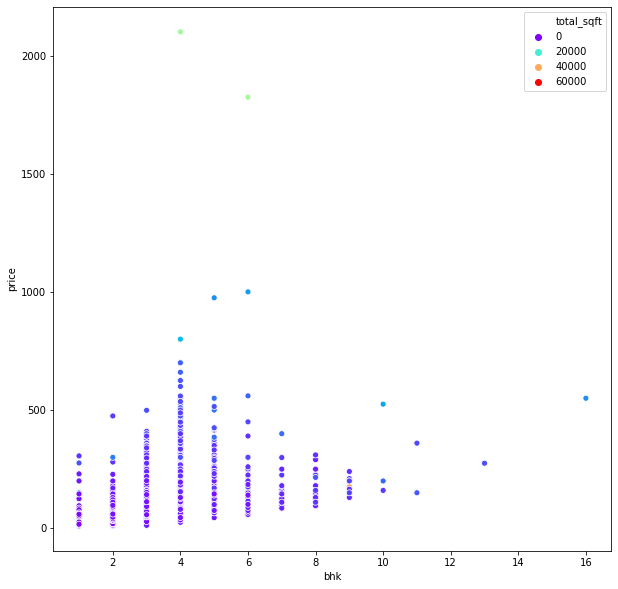

In [56]:
plt.figure(figsize=(10,10))
palette = sns.color_palette("bright")
sns.scatterplot(y="price",x = "bhk" ,data=df5,palette="rainbow",hue='total_sqft')
plt.show()

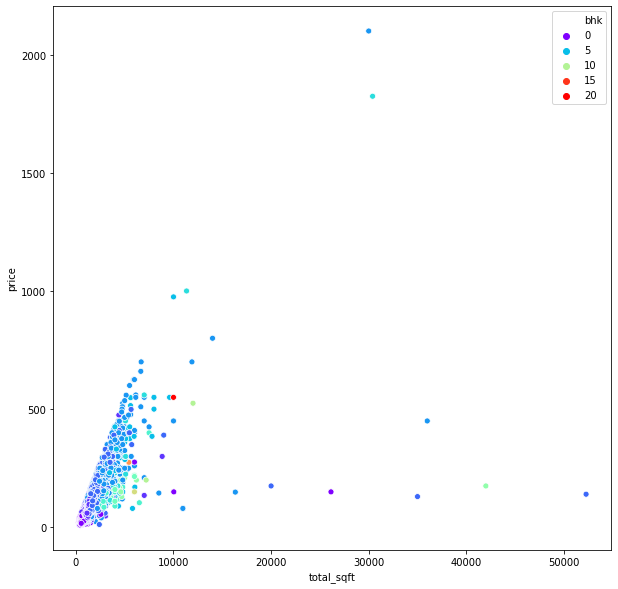

In [57]:
plt.figure(figsize=(10,10))
palette = sns.color_palette("bright")
sns.scatterplot(y="price",x = "total_sqft" ,data=df5,palette="rainbow",hue='bhk')
plt.show()

In [58]:
raw_data = df5.drop(['price_per_sqft'],axis= 1)

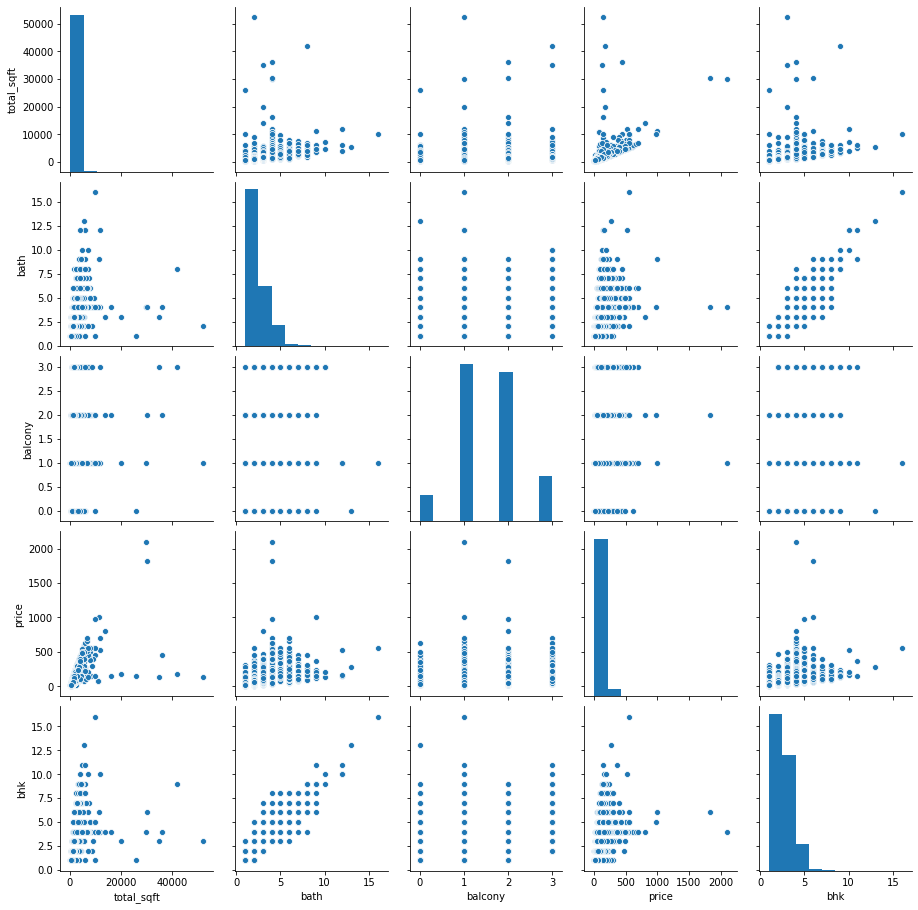

In [94]:
sns.pairplot(raw_data)
plt.show()

In [59]:
dummies = pd.get_dummies(raw_data.location,drop_first=True)
dummies.head(5)

,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df6 = pd.concat([raw_data,dummies],axis=1)
df6.head()

,location,total_sqft,bath,balcony,price,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,1200.0,2.0,1.0,51.00,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df6 = df6.drop('location',axis=1)
df6.head()

,total_sqft,bath,balcony,price,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1056.0,2.0,1.0,39.07,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,3.0,120.00,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3.0,62.00,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,1.0,95.00,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,1.0,51.00,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
X = df6.drop(['price','balcony'],axis = 1)
y = df6['price']

In [96]:
X.head()

,total_sqft,bath,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1056.0,2.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [98]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
model1.score(X_test,y_test)

0.6312222310758802

In [100]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.3,random_state=0)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([-1.41912264e+14,  5.82391615e-01,  4.79274863e-01,  5.77322941e-01,
        4.53563985e-01])

In [101]:
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV

In [102]:
lassoCV = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lassoCV.fit(X_train,y_train)
lassoCV.alpha_

0.002284139765691339

In [103]:
lasso_reg = Lasso(lassoCV.alpha_)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.002284139765691339, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [104]:
from sklearn.metrics import r2_score

In [105]:
y_pred_model1 = model1.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)
print(r2_score(y_test,y_pred_lasso))
print(r2_score(y_test,y_pred_model1))

0.6319434144945888
0.6312222310758802


In [107]:
ridgecv = RidgeCV(cv =10, normalize = True)
ridgecv.fit(X_train,y_train)
ridgecv.alpha_

0.1

In [108]:
ridge_reg = Ridge(ridgecv.alpha_)
ridge_reg.fit(X_train,y_train)
y_pred_ridge = ridge_reg.predict(X_test)
print(r2_score(y_test,y_pred_ridge))

0.6315122373857944


In [115]:
np.where(X.columns=='1st Phase JP Nagar')[0][0]

3

In [116]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x =np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lasso_reg.predict([x])[0]

In [117]:
predict_price('1st Phase JP Nagar',1000,2,2)

97.94282024944978

In [118]:
import pickle
with open ('Bengaluru House Price.pickle','wb') as f:
    pickle.dump(lasso_reg,f)

In [119]:
import json
colums = {
    'data_columns' :[col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(colums))